# co5bold data - anteckningar

- i teststjärnan ['Z'][0][0]:
    substructure FUL.Z contains the original data arrays from the model file like the spatial axes, density rho, internal energy ei, and the three spatial components of the velocity (v1, v2, v3):

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler

     37 - internal energy erg/g - för att göra om till temperaturer? Behövs ej för Bernd har redan gjort det.

- teststar['EOS'][0][0]: Equation of state

    [0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

    [1] - är 317 x 317 x 317 stor matris med värden mellan 691 och 50441

    Dessa är nog temperaturerna som Bernd har räknat ut åt mig!

    Tstar = teststar['EOS'][0][0][1][x][y][z]

- teststar['OPA']: opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

    ['OPA'][0][0][0] är en 317**3 array.
    
    Så den är rumsberoende, men itne våglängdberoende? > grå kropp

    ['OPA'][0][0][0][x][y][z]

    Dessa kan jag avrunda till en handfull konstantet.

    s 42 i c5d-manualen säger att delta tau = kappa * rho * deltax vilket "imply'ar" att kappa har enheten cm2/g, dvs är massabsorption.

- ['PAR'] - har info om själva beräkningstid etc, inställningar

    ['PAR'][0][0][2] Är stjärnans detaljer:

```py
    [b'Parameter file for RHD code:'
    b'3D grey dust-free AGB star model: 1 M_Sun, 355 R_Sun, L=7000 L_Sun'
    b'Start model st28gm06n043_300.end with 317^3 points'
    b'New code version 2020-07-04: MPI+OpenMP'
    b'Increase envelope mass gradually to 0.2 M_sun']
```
Notera: 355Rsun ~ 1.651 AU

Och Grid'et i detta testobjektet är 2 * 3.65AU stort.

- Diverse data

```py
# Size of grid
print(np.shape(teststar['EOS'][0][0][0]))

# Number of cells along each axis
print(teststar['Z'][0][0][4])

# Total time(?)
print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")
```

- påminnelse

```L = 4pi R^2 sigma Teff^4```

SB-constant: sigma = 5.670367e-8 W m-2 K-4

Exempel: st28gm06n056

355 Rsun (= 355 * 695508000m = 246905340000 )

7000Lsol (= 7000 * 3.828e26 W = 2.6796e30 W) 

ger

Teff = 2802.5 ~ 2800K

1e4Lsol ger Teff = 3063.9K ~ 3060K



In [19]:
# Notebook for exploring the data insize the sav-file

import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
# st28gm06n052_186.sav
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)
print('\n\n')

print(teststar['OPA'])



('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')



[rec.array([(array([[[0.0006049 , 0.00060659, 0.00060921, ..., 0.00047209,
         0.00046558, 0.00046406],
        [0.00060768, 0.00060912, 0.00061161, ..., 0.00046288,
         0.00045556, 0.00045286],
        [0.00061107, 0.00061268, 0.0006149 , ..., 0.00047399,
         0.0004661 , 0.00046265],
        ...,
        [0.0007123 , 0.0007172 , 0.00072147, ..., 0.00076428,
         0.00075889, 0.00075496],
        [0.00070279, 0.00070707, 0.0007106 , ..., 0.00075953,
         0.00075437, 0.00075067],
        [0.00072682, 0.00073219, 0

In [12]:
# Ongoing stuff
# Load opacities
from scipy.io.idl import readsav

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
#print(teststar.dtype.names)

#nn=0

#print(teststar['OPA'][0][0][0][0][0][0])
#print(np.shape(teststar['OPA'][0][0][nn]))
#print(np.max(teststar['EOS'][0][0][1]))

# Size of the grid
#nc5dedge = np.size(teststar['Z'][0][0][16])

# Total time?
print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}: {teststar['Z'][0][0][7]/3600/24/365.25} yr")

# move opacities to array
#c5dstar_opacities = np.zeros((nc5dedge,nc5dedge,nc5dedge))

#for nx in range(nc5dedge):
#    for ny in range(nc5dedge):
#        for nz in range(nc5dedge):
#            c5dstar_opacities[nx,ny,nz] = teststar['OPA'][0][0][0][nx][ny][nz]


695004992.0 b's': 22.023379217684486 yr


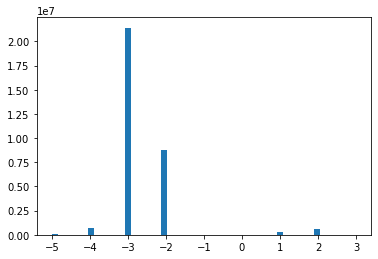

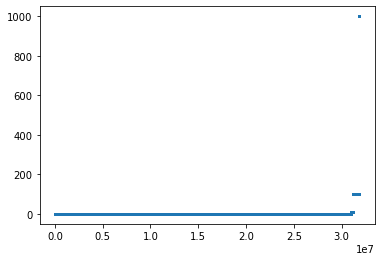

In [4]:
# study opacities

opac1d = c5dstar_opacities.ravel()

import matplotlib.pyplot as plt

# Approximate to factor tens
opac1d = 10**np.round(np.log10(opac1d))

plt.figure(1)
plt.hist(np.log10(opac1d), bins=50);

plt.figure(2)
plt.plot(np.sort(opac1d),'.',markersize=1)

# problemet kvarstår att jag har bara "ett värde" här per cell
# det ska ju vara ett våglängdsberoende, så vad är detta kappa?

# annars, till senare
# översätt 3d-arrayen till r3d-data-lista i r3d-gridet
# gör denna avrudningen fast i r3d-listan istället
# tack vare listorna med griddistances så vet jag vilken cell som är vilken ju
# då kan jag använda detta för att dela upp listan i dust_densities_star.inp's
# till flera olika species
# > i en specie så är det 0 g/cm3 i de celler där en annan specie huserar.



In [5]:
# Create grids to translate data into and explore the 3D distributions

# Create r3d-grid to use for my tests
# in case I need a grid with cellsizes in relation to c5d cellsizes

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load all necessary details from c5d-data
c5dgrid = a5d.load_grid_coordinates()
nc5dedge = np.size(c5dgrid[:,0])
nc5dcube = nc5dedge**3

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()


# Set settings for new grid, in this specific case:
# (normally, plot and check the density distribution against R)
# (or later, just use the same size of the grid, set some good refinement
#  limits)
# 6AU side (the star seems to end at R=2AU so 3AU is good enough for this test)
# smallest grid cells are c5dcellsize > basecells are c5dcellsize*2**4
#r3dedge = 2*5*AUcm
#nxyz = 10
#refinementlist = [0.8*r3dedge,0.6*r3dedge,0.4*r3dedge,0.2*r3dedge]
#refinementlist_au = [refs/AUcm for refs in refinementlist]

# Use these for adapting cell sizes to c5d cell sizes
r3dedge = 2 * 3.5 * AUcm
basecell = c5dcellsize*1.1 * 2**4
nxyz = r3dedge/basecell
refinementlist_au = [3.5,2.9,2.3,1.7]
refinementlist = [refs*AUcm for refs in refinementlist_au]

# Create new smaller grid
# Mind that create-grid function automatically adapts nxyz and gridedge so that
# nxyz is an even integer and cell sizes are kept as set in the initial settings
c3d.create_grid(r3dedge/AUcm, nxyz, refinementlist_au, savegrid=True)


Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.262420974257731 AU
Number of base cells along one side of the grid: 18
Distances to refinement limits from centrum: [3.5, 2.9, 2.3, 1.7] AU
Number refinements: 4
Size of base cell: 0.40346783190320734 AU
Child cell size 1: 0.20173391595160367 AU
Child cell size 2: 0.10086695797580184 AU
Child cell size 3: 0.05043347898790092 AU
Child cell size 4: 0.02521673949395046 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid: done.



In [6]:
import analyze_co5bold_functions as a5d
a5d.create_star()

Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star: done.



/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:498: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


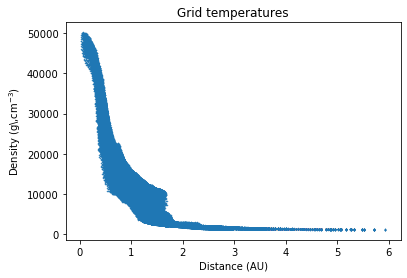

In [7]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

a3d.plot_temperature_radius(temperature_path='../dust_temperature_star.dat')



/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:379: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


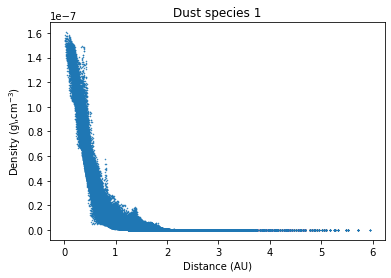

In [8]:
import analyze_r3d_functions as a3d

a3d.plot_onedensity_radius(density_path='../dust_density_star.inp')


# Test star creation

Creates a test star for rad-trans-sims with black/grey opacity.

In [11]:
# Create grid
import create_r3d_functions as c3d

# Smallest c5d cells are 2*3.65/317 AU = 0.02302839116719243 AU
# Radius of star: 1.651AU (355 Rsun)
# Settings for the grid
AUcm = 1.49598e13 # cm
r3dedge = 2 * 3.65 * AUcm # Size of whole grid
basecell = 0.0230284 *AUcm * 2**4 # Size of base cells (based on smallest cells)
nxyz = r3dedge/basecell
refinementlist_au = [3.65,3.0,2.4,1.8]
refinementlist = [refs*AUcm for refs in refinementlist_au]

# Force inner refinements to end at 1.5 AU
inrefine = 1.5/(4*refinementlist_au[-1])

c3d.create_grid(
    gridedge=r3dedge/AUcm, 
    nxyz=nxyz, 
    refinementlist=refinementlist_au, 
    inrefine=inrefine, 
    savegrid=True
)


Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.369088 AU
Number of base cells along one side of the grid: 20
Distances to outer refinement limits from centrum: [3.65, 3.0, 2.4, 1.8] AU
Distances to inner refinement limits from centrum: [0.375, 0.75, 1.125, 1.5] AU
Number refinements: 4
Size of base cell: 0.3684544 AU
Child cell size 1: 0.1842272 AU
Child cell size 2: 0.0921136 AU
Child cell size 3: 0.0460568 AU
Child cell size 4: 0.0230284 AU
Writing amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Writing grid_info.txt
Create grid:
    amr_grid.inp
    grid_info.txt
    grid_distances.csv
    grid_cellsizes.csv
DONE



In [1]:
import analyze_co5bold_functions as a5d
import os

for phase in ['140','141','142']:
#for phase in ['140']:
    print(f'Doing phase: {phase}')
    path = f'../r3dresults/st28gm06n056/'

    a5d.create_star(
        savpath=f'../co5bold_data/dst28gm06n056/st28gm06n056_{phase}.sav',
        amrpath=path+'amr_grid.inp',
        gridpath=path+'grid_distances.csv',
        sizepath=path+'grid_cellsizes.csv'
    )

    print('Moving files\n')
    os.system(
        f'mv ../dust_density_onestar.inp {path}{phase}/'
    )
    os.system(
        f'mv ../dust_temperature_onestar.dat {path}{phase}/'
    )
    os.system(
        f'mv ../star_opacities.dat {path}{phase}/star_opacities.dat'
    )

print('All done')


Doing phase: 140
Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star:
    dust_density_onestar.inp
    dust_temperature_onestar.dat
    star_opacities.dat
DONE

Moving files

Doing phase: 141
Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
C5D Dust-star:
    dust_density_onestar.inp
    dust_temperature_onestar.dat
    star_opacities.dat
DONE

Moving files

Doing phase: 142
Loading R3D grid
Loading C5D grid properties
Loading C5D star properties (density, temperature, opacity)
Translating C5D data to R3D data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of

In [4]:
# Find relative size of STD of temperature and opacity
import analyze_co5bold_functions as a5d
import analyze_r3d_functions as a3d
import numpy as np
import scipy.stats

opacity = a5d.load_staropacities(path='../r3dresults/st28gm06n056/140/star_opacities.dat')
a,b,temperature = a3d.load_temperature(path='../r3dresults/st28gm06n056/140/dust_temperature_onestar.dat')


print(scipy.stats.median_absolute_deviation(np.log10(opacity)))
print(scipy.stats.median_absolute_deviation(temperature))

print(np.std(np.log10(opacity)))
print(np.std(temperature))




0.7020124004303194
558.6017335910797
1.1788324932232441
1937.3116090811484


Doing phase: 140
Removing density spikes
2-5: Number of smoothed Density cells: 837176
C5D smooth densities:
    dust_density_smoothed.inp
DONE

Loading density, opacity, wavelengths
Change density to densityr3d = 1.0 * kappac5d * densityc5d
Writing new radmc3d-files
Writing opacity files for the binned star.
C5D create star opacities densities:
    dust_density_opastar.inp
    dustopac_star.inp
    dustkappa_opastar.inp
DONE

All done
Extracting species number 1: opastar


1.7453303676295646

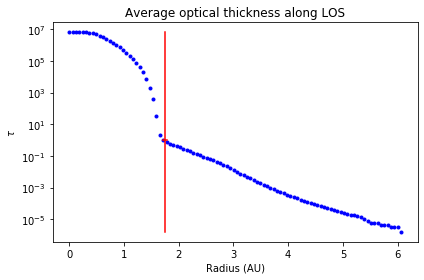

In [13]:
import analyze_co5bold_functions as a5d
import os

#for phase in ['140','141','142']:
#for phase in ['141','142']:
for phase in ['140']:
    print(f'Doing phase: {phase}')

    #path = f'../r3dresults/duststar_{nbins}specie_st28gm06n056_{phase}/'
    #path = f'../r3dresults/duststar_tests_st28gm06n056_{phase}/'
    path = f'../r3dresults/st28gm06n056/'

    # Smooth a5d-Opacity to remove neg spikes
    #
    # 10**0.3 = 1.9
    #a5d.smooth_opacity(
    #    path = f'{path}{phase}/star_opacities.dat',
    #    smooth_out = 4,
    #    smooth_in = 3,
    #    smooth_tolerance_log = 0.2
    #)
    #os.system(f'mv ../star_opacities_smoothed.dat {path}{phase}/')


    # Smooth a5d-temperature to remove positive spikes
    #a5d.smooth_temperature(
    #    path = f'{path}{phase}/dust_temperature_onestar.dat',
    #    smooth_out = 10,
    #    smooth_in = 3,
    #    smooth_tolerance = 1.2
    #)
    #os.system(f'mv ../dust_temperature_smoothed.dat {path}{phase}/dust_temperature.dat')


    # Smooth a5d-densities to remove positive spikes
    a5d.smooth_density(
        path = f'{path}{phase}/dust_density_onestar.inp',
        smooth_out = 2,
        smooth_in = 1,
        smooth_tolerance = 1.0
    )
    os.system(f'mv ../dust_density_smoothed.inp {path}{phase}/dust_density_onestar_smoothed.inp')


    a5d.create_staropadensity(
        #pathopacity = f'{path}{phase}/star_opacities_smoothed.dat',
        pathopacity = f'{path}{phase}/star_opacities.dat',
        pathstardensity = f'{path}{phase}/dust_density_onestar_smoothed.inp',
        #pathstardensity = f'{path}{phase}/dust_density_onestar.inp',
        pathwavelength = f'{path}wavelength_micron.inp',
        corrfac = 1.0
    )
    os.system(f'mv ../dust_density_opastar.inp {path}{phase}/dust_density.inp')
    os.system(f'mv ../dustkappa_opastar.inp {path}{phase}/')
    os.system(f'mv ../dustopac_star.inp {path}{phase}/dustopac.inp')
    
print('All done')
os.system('spd-say "Moo"');


# Plot optdepth

import analyze_r3d_functions as a3d

a3d.compute_opticalthick(
    path='../r3dresults/st28gm06n056/140/'
) / 1.49598e13



In [ ]:
# Plot optdepth

import analyze_r3d_functions as a3d

a3d.compute_opticalthick(
    path='../r3dresults/st28gm06n056/140/'
) / 1.49598e13


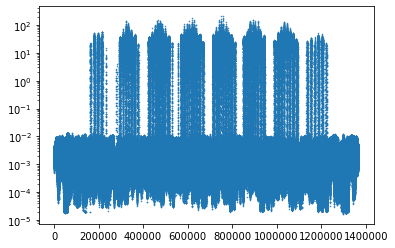

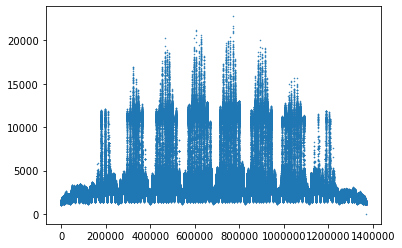

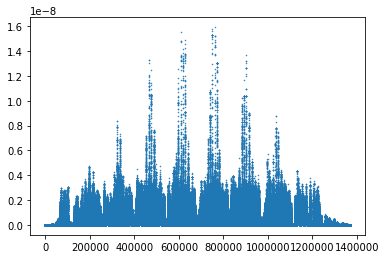

In [2]:
import matplotlib.pyplot as plt
import analyze_co5bold_functions as a5d
import analyze_r3d_functions as a3d

opacity = a5d.load_staropacities(path='../r3dresults/st28gm06n056/140/star_opacities_smoothed.dat')
a,b,temperature = a3d.load_temperature(path='../r3dresults/st28gm06n056/140/dust_temperature.dat')
a,b,densities = a3d.load_dustdensity(path='../r3dresults/st28gm06n056/140/dust_density_onestar_smoothed.inp',numb_specie=1)

plt.figure(1)
plt.plot(opacity,'.',markersize=1)
plt.yscale('log')

plt.figure(2)
plt.plot(temperature,'.',markersize=1)

plt.figure(3)
plt.plot(densities,'.',markersize=1)



In [ ]:
a,b,densities = a3d.load_dustdensity(path='../r3dresults/st28gm06n056/140/dust_density_onestar.inp',numb_specie=1)

plt.figure()
plt.plot(densities,'.',markersize=1)

SED-Luminosity: 11194.856295993039 Lsol
BB-temperature: 2803.0477292384603 K
Image-Luminosity: 0.0 Lsol


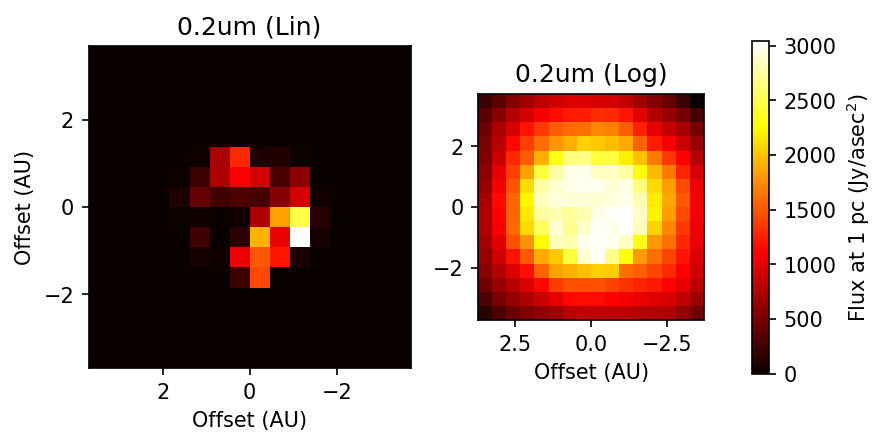

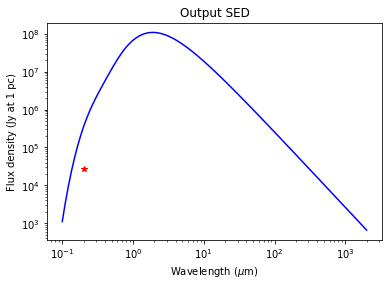

In [14]:
import analyze_r3d_functions as a3d
import matplotlib.pyplot as plt

path = '../r3dresults/st28gm06n056/140/'

# Plot images
#imagewaves = [
#    0.1,0.2,0.3,0.4,0.5,0.75,1,2,3,4,5,10,1000
#]
imagewaves = [0.2]

images = [f'image_{imagewave}um.out' for imagewave in imagewaves]

testflux = a3d.plot_images(
    path=path,
    images=images,
    distance=1
)

maxflux,maxwave = a3d.plot_sed(path=f'{path}spectrum_i_0.out')
plt.plot(imagewaves,testflux,'r*')

# Compute luminosity
incls = [0]
lum = 0

for incl in incls:
    lum += a3d.compute_sed_luminosity(path=f'{path}spectrum_i_{incl}.out')

lum /= len(incls)*3.828e26

# Printouts
print(f"SED-Luminosity: {lum} Lsol")
print(f'BB-temperature: {2.998e8/(5.879e10 * maxwave*1e-6)} K')
print(f'Image-Luminosity: {a3d.compute_luminosity(wavelengths=imagewaves,spectrum=testflux)/3.828e26} Lsol')
#print(f'Max flux: {maxflux} Jy, at {maxwave} um.')


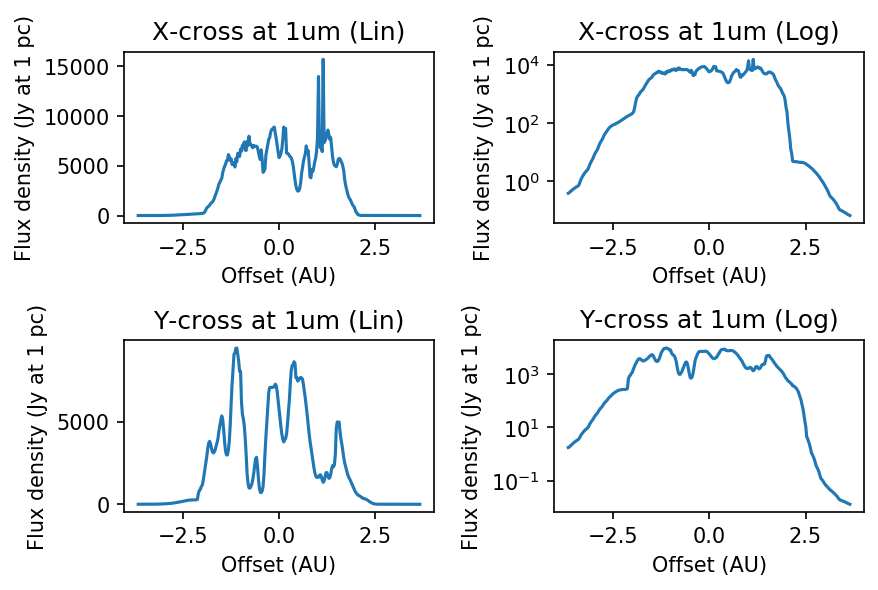

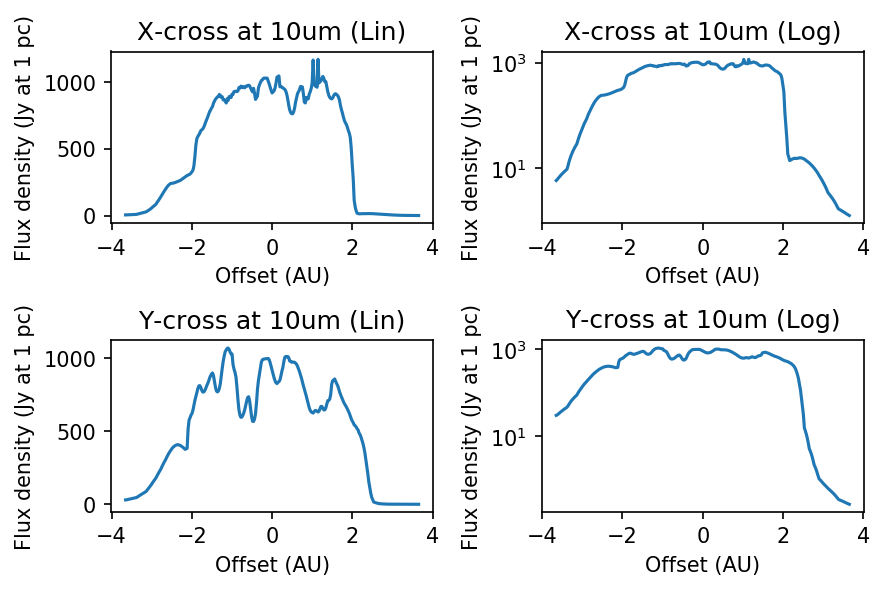

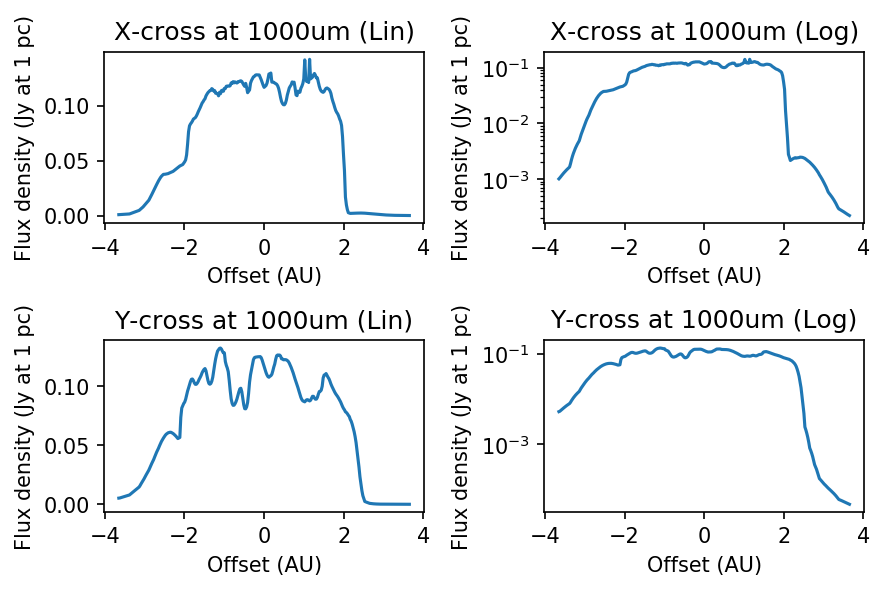

In [12]:
import analyze_r3d_functions as a3d

path = '../r3dresults/st28gm06n056/141/'
imagewaves = [1,10,1000]
images = [f'image_{imagewave}um.out' for imagewave in imagewaves]

testflux = a3d.plot_imagecrosssections(
    path=path,
    images=images,
    distance=1
)


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:556: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:576: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:596: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


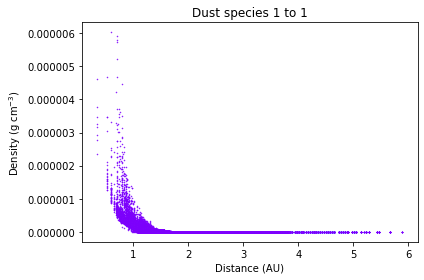

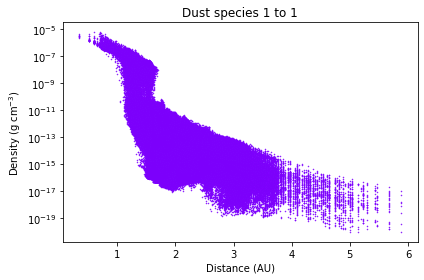

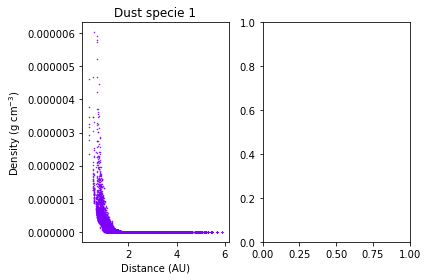

In [4]:
import analyze_r3d_functions as a3d

a3d.plot_alldensity_radius(
    path='../r3dresults/st28gm06n056/140/'
)

/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:718: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:742: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


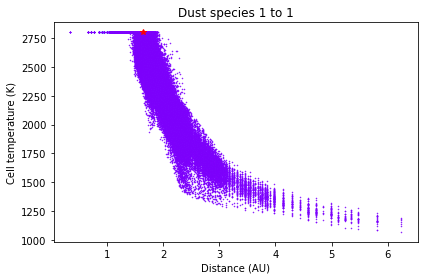

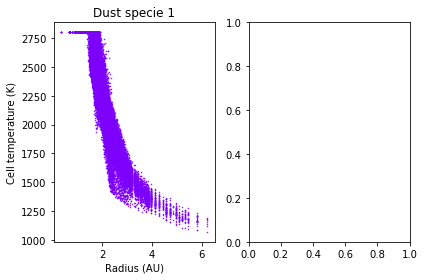

In [3]:
import analyze_r3d_functions as a3d

a3d.plot_alltemperature_radius(
    path='../r3dresults/st28gm06n056/140/'
)

Extracting species opastar


/home/joachim/exwings/exwings-codes/analyze_co5bold_functions.py:348: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


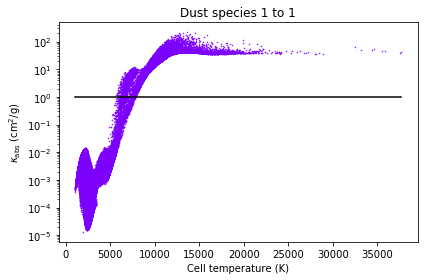

In [8]:
import analyze_co5bold_functions as a5d
a5d.plot_opakappatemperature(path='../r3dresults/st28gm06n056/140/')


/home/joachim/exwings/exwings-codes/analyze_co5bold_functions.py:250: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


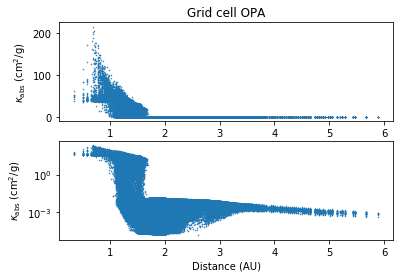

In [9]:
import analyze_co5bold_functions as a5d

a5d.plot_opakapparadius(
    path='../r3dresults/st28gm06n056/140/'
)


Extracting species opastar


/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:828: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax[nn].set(
/home/joachim/exwings/exwings-codes/analyze_r3d_functions.py:836: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


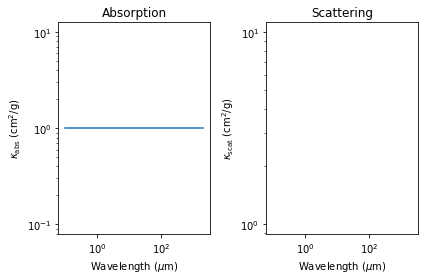

In [2]:
import analyze_r3d_functions as a3d

a3d.plot_allkappa(
    path='../r3dresults/st28gm06n056/140'
)
